<a href="https://colab.research.google.com/github/Demon-Sheriff/Linear-Alg_ML_fs/blob/master/Jamboree_LR_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!gdown 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 27.1MB/s]


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

In [81]:
path = '/content/Jamboree.csv'
df = pd.read_csv(path)

In [82]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [83]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [84]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [85]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 8)
(400,)
(100, 8)
(100,)


In [88]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

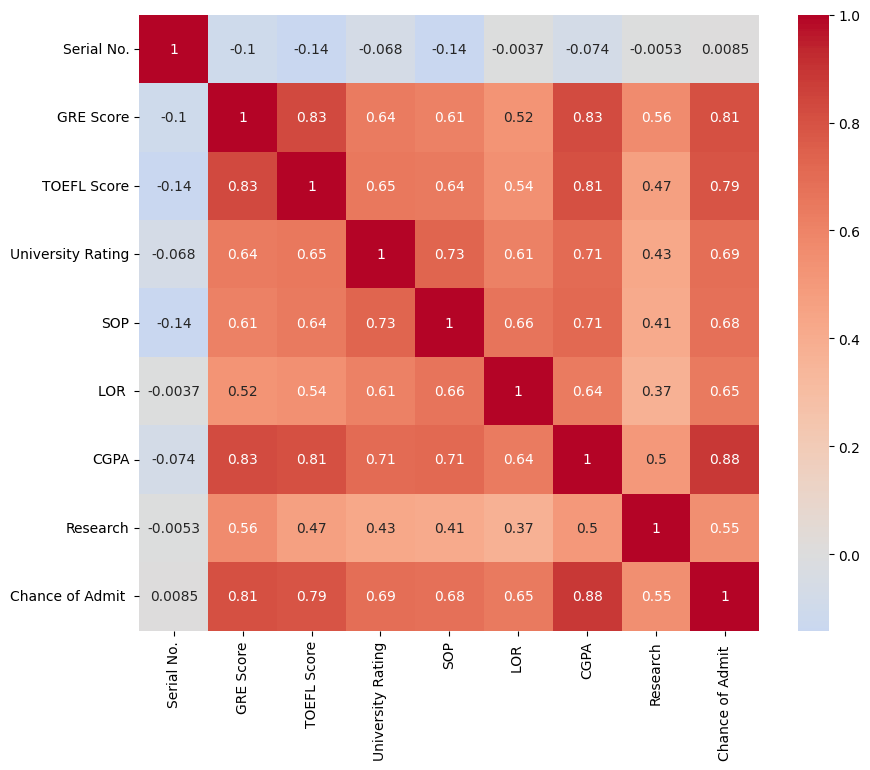

In [89]:
# checking up correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


In [90]:
# checking up VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df, i) for i in range(df.shape[1])]

print(vif_data)


             feature          VIF
0         Serial No.     4.215632
1          GRE Score  1542.687799
2        TOEFL Score  1263.620398
3  University Rating    21.595270
4                SOP    36.442724
5               LOR     31.949796
6               CGPA  1238.355223
7           Research     3.254613
8   Chance of Admit    118.691315


In [91]:
df.shape

(500, 9)

In [92]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [93]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(df)

# Explained variance by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [9.92102587e-01 7.33995004e-03 4.57609816e-04 5.66230164e-05
 1.89753543e-05 1.26967053e-05 7.80470623e-06 3.59434354e-06
 1.59163501e-07]


In [94]:
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [95]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [96]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research


<Figure size 640x480 with 0 Axes>

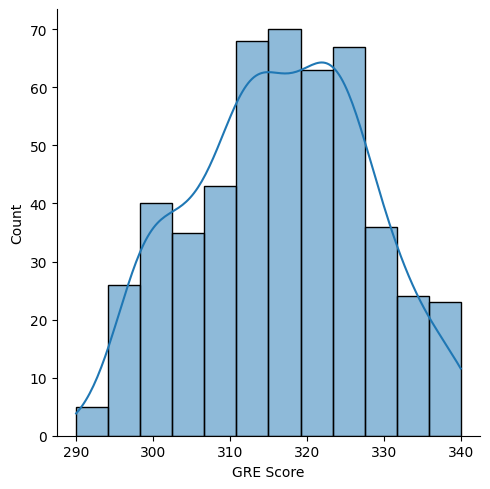

<Figure size 640x480 with 0 Axes>

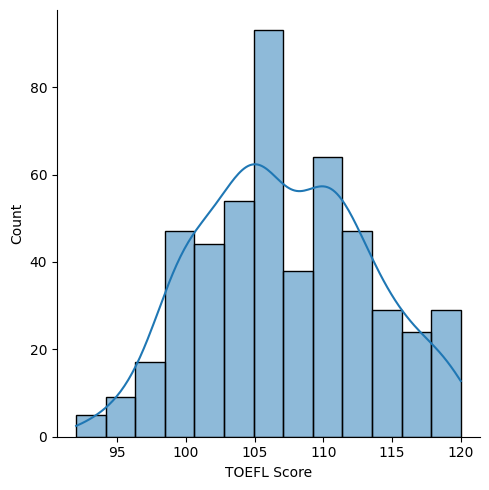

<Figure size 640x480 with 0 Axes>

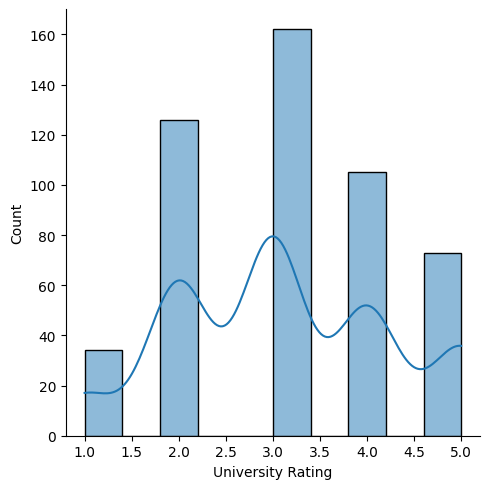

<Figure size 640x480 with 0 Axes>

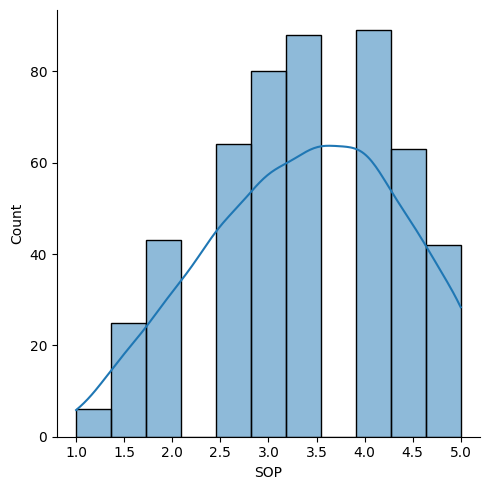

<Figure size 640x480 with 0 Axes>

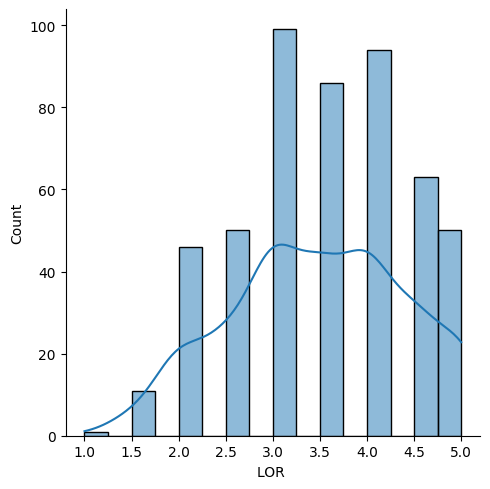

<Figure size 640x480 with 0 Axes>

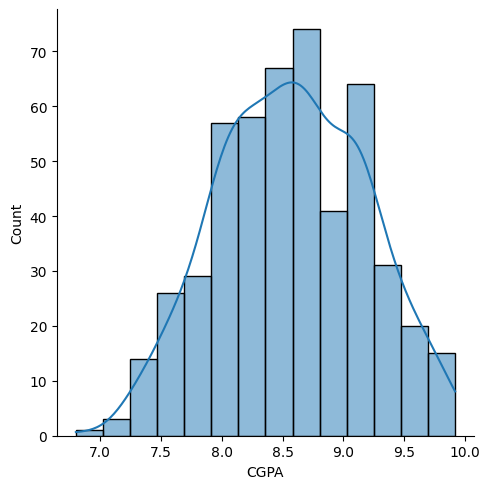

<Figure size 640x480 with 0 Axes>

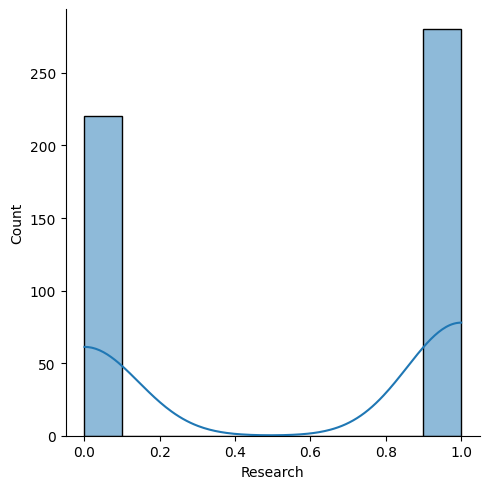

In [97]:
# Plotting trends in features

import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
  if col not in ('Serial No.', 'Chance of Admit '):
    print(col)
    plt.figure()
    sns.displot(df[col],kde=True)

In [98]:
# using normal equations for linear regression.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
lin_reg.coef_

array([0.01254946, 0.02718413, 0.02089987, 0.00301375, 0.00417126,
       0.01376289, 0.06550222, 0.01107744])

In [100]:
lin_reg.intercept_

0.7241749999999999

In [101]:
y_pred = lin_reg.predict(X_test)

In [102]:
lin_reg.score(X_test, y_test)

0.826348139603975

In [103]:
# 0.81 score is not bad at all

# **Calculating R squared MSE and MAE**

In [104]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R² Score: 0.826348139603975
Mean Squared Error: 0.003551180545098712
Mean Absolute Error: 0.043258852595452923


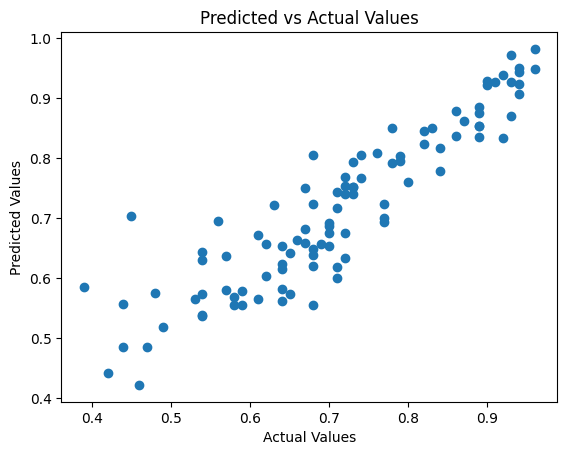

In [105]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# **Using SGD regressor from sklearn**

In [106]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, learning_rate='invscaling', random_state=42) # no regularization applied
sgd_reg.fit(X_train, y_train)

SGDRegressor(penalty=None, random_state=42)

In [107]:
y_pred = sgd_reg.predict(X_test)

# **Checking the Fit**

In [108]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.00369079425032996
R² Score: 0.8195210635535473


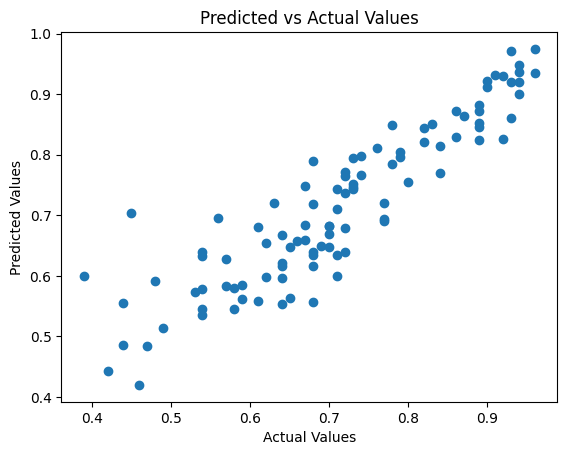

In [109]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# **Using StatsModel Linear Regression**

In [110]:
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# add a constant for intercept to the training and test set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [111]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [112]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     236.4
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.20e-144
Time:                        14:57:40   Log-Likelihood:                 570.60
No. Observations:                 400   AIC:                            -1123.
Df Residuals:                     391   BIC:                            -1087.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4755      0.12

In [113]:
y_pred = results.predict(X_test)


# **Checking the fit and model score**

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE on test data:", mean_squared_error(y_test, y_pred))
print("R-squared on test data:", r2_score(y_test, y_pred))

MSE on test data: 0.00355118054509871
R-squared on test data: 0.8263481396039751


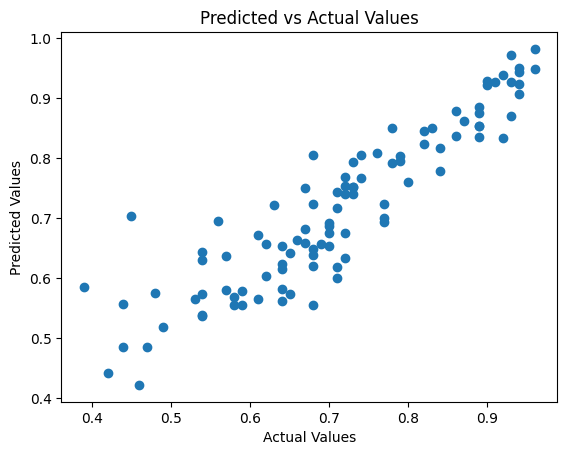

In [115]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()